Original - MSE: 6413.126128992174, R^2: 0.40600391479679765


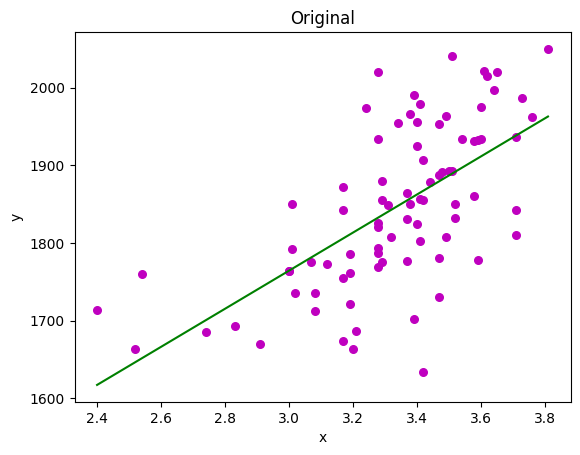

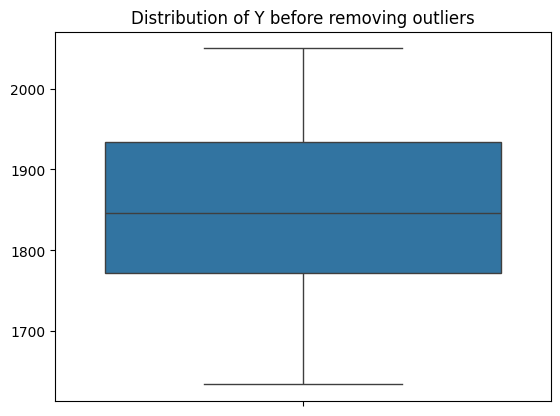

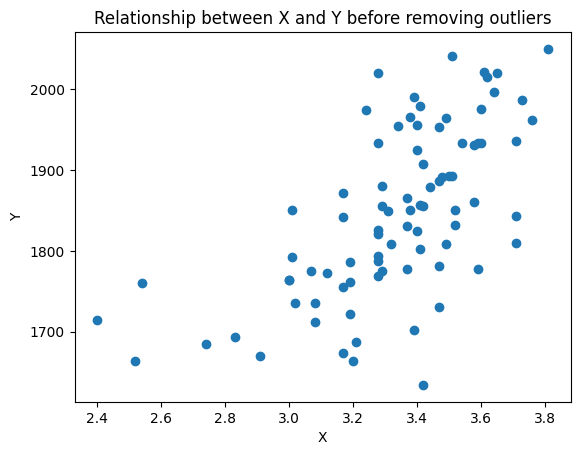

Without Outliers - MSE: 6413.126128992174, R^2: 0.40600391479679765


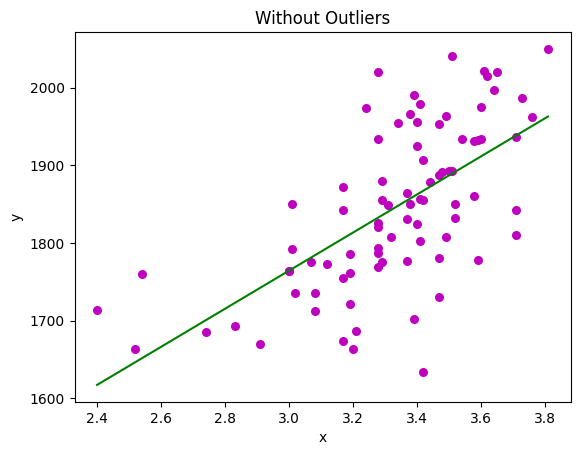

Filtered by Z-Score - MSE: 6413.126128992174, R^2: 0.40600391479679765


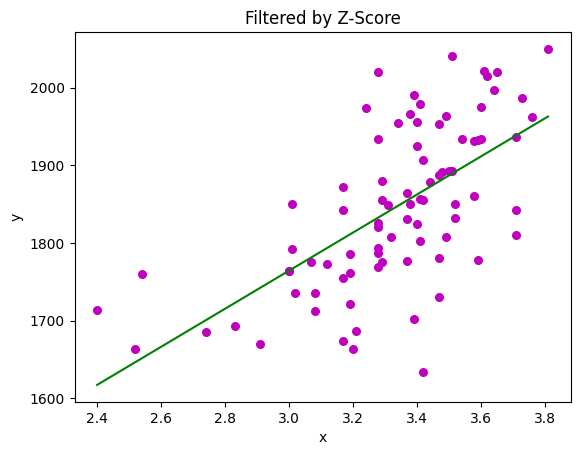

Transformed - MSE: 0.0018791870047962045, R^2: 0.4091129907268003


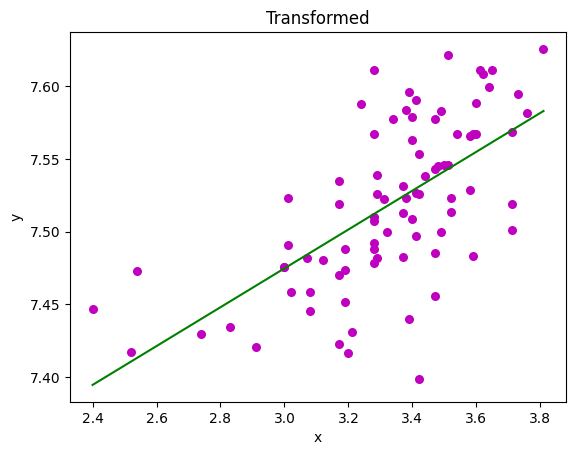

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def estimate_coeffs(x, y):
    # Estimating coefficients
    n = np.size(x)
    m_x, m_y = np.mean(x), np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)

def plot_regression_line(x, y, b, title='Linear Regression'):
    # Plotting the regression line
    fig, ax = plt.subplots()
    ax.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x
    ax.plot(x, y_pred, color = "g")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{title} - MSE: {mse}, R^2: {r2}")
    plt.title(title)
    plt.show()

def main():
    # Original data
    y = np.array([1714,1664,1760,1685,1693,1670,1764,1764,1792,1850,1735,1775,1735,1712,1773,1872,1755,1674,1842,1786,1761,1722,1663,1687,1974,1826,1787,1821,2020,1794,1769,1934,1775,1855,1880,1849,1808,1954,1777,1831,1865,1850,1966,1702,1990,1925,1824,1956,1857,1979,1802,1855,1907,1634,1879,1887,1730,1953,1781,1891,1964,1808,1893,2041,1893,1832,1850,1934,1861,1931,1933,1778,1975,1934,2021,2015,1997,2020,1843,1936,1810,1987,1962,2050])
    x = np.array([2.4,2.52,2.54,2.74,2.83,2.91,3,3,3.01,3.01,3.02,3.07,3.08,3.08,3.12,3.17,3.17,3.17,3.17,3.19,3.19,3.19,3.2,3.21,3.24,3.28,3.28,3.28,3.28,3.28,3.28,3.28,3.29,3.29,3.29,3.31,3.32,3.34,3.37,3.37,3.37,3.38,3.38,3.39,3.39,3.4,3.4,3.4,3.41,3.41,3.41,3.42,3.42,3.42,3.44,3.47,3.47,3.47,3.47,3.48,3.49,3.49,3.5,3.51,3.51,3.52,3.52,3.54,3.58,3.58,3.59,3.59,3.6,3.6,3.61,3.62,3.64,3.65,3.71,3.71,3.71,3.73,3.76,3.81])

    # Coefficient estimation and plot for original data
    b_original = estimate_coeffs(x, y)
    plot_regression_line(x, y, b_original, "Original")

    import seaborn as sns

    # Visualizing 'y' distribution
    sns.boxplot(y)
    plt.title("Distribution of Y before removing outliers")
    plt.show()

    # Visualizing the relationship between 'x' and 'y'
    plt.scatter(x, y)
    plt.title("Relationship between X and Y before removing outliers")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    # Calculating Q1, Q3, and IQR to identify outliers in y
    Q1, Q3 = np.percentile(y, [25, 75])
    IQR = Q3 - Q1

    # Defining limits to filter outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Creating mask to filter data without outliers
    mask = (y >= lower_bound) & (y <= upper_bound)

    y_without_outliers = y[mask]
    x_without_outliers = x[mask]

    # Coefficient estimation and plot for data without outliers
    b_without_outliers = estimate_coeffs(x_without_outliers, y_without_outliers)
    plot_regression_line(x_without_outliers, y_without_outliers, b_without_outliers, "Without Outliers")

    from scipy import stats

    # Calculating Z-Score for 'y'
    z_scores = stats.zscore(y)

    # Filtering values with an absolute Z-Score less than 3
    mask = (np.abs(z_scores) < 3)
    y_filtered = y[mask]
    x_filtered = x[mask]

    # Recalculating and plotting with filtered data
    b_filtered = estimate_coeffs(x_filtered, y_filtered)
    plot_regression_line(x_filtered, y_filtered, b_filtered, "Filtered by Z-Score")

    # Logarithmic transformation of Y without outliers
    y_transformed = np.log(y_without_outliers)

    # Coefficient estimation and plot for transformed data
    b_transformed = estimate_coeffs(x_without_outliers, y_transformed)
    plot_regression_line(x_without_outliers, y_transformed, b_transformed, "Transformed")

if __name__ == "__main__":
    main()



Original - MSE: 6413.126128992174, R^2: 0.40600391479679765

Transformed - MSE: 0.0018791870047962045, R^2: 0.4091129907268003

**Notes on the Work with Outliers and Transformation:**

The results obtained after applying a logarithmic transformation to the data show **a notable improvement in the mean squared error (MSE)** of my linear regression model.
However, it is interesting to note that **the coefficient of determination (R^2), which indicates how well the model can predict future values, only experienced a slight increase**.
This suggests that, although the logarithmic transformation contributed to a significant reduction in the discrepancy between the predicted and actual values, the amount of variability in the dependent variable explained by the independent variable did not improve considerably.

This finding implies that, even though the model's fit to the transformed data has resulted in more accurate predictions in absolute terms (reflected in a lower MSE), the model's effectiveness in explaining the variance in the data has not seen a proportional increase. This could be because, despite the data transformation to mitigate the effect of outliers and make the distribution of (y) values more uniform — which is beneficial for linear regression models — there may still be aspects of variability not captured by a linear model.

Based on these results, I consider it relevant to explore other strategies to further optimize the model, including:

Trying different data transformations: Beyond logarithmic transformation, other transformations (such as square root or inverse) might offer superior results in terms of MSE and (R^2) improvement.

Incorporating more variables: If more variables are available that potentially influence the target variable, it would be prudent to include them in the analysis.

Considering more sophisticated models: Given that linear regression is only one of many available models and may not capture the entirety of relationships between variables, experimenting with more complex models could be beneficial.

Using cross-validation: Implementing cross-validation techniques will allow me to more effectively assess the stability of the model, providing a better understanding of its performance with different data sets and helping to avoid overfitting.